<a href="https://colab.research.google.com/github/vinayp1210/ML/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kmean clustering with centroid

In [ ]:
import numpy as np
data = np.array([[1.0, 1.5, 3.0, 5.0, 3.5, 4.5, 3.5],
                 [1.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.5]])
centroids = np.array([[1.0, 1.0],
                      [5.0,7.0]])
def assign_to_clusters(data, centroids):
  distances = np.sqrt(np.sum((data[:, np.newaxis, :] - centroids) ** 2, axis = 2))
  cluster_assignments = np.argmin(distances, axis = 1)
  return cluster_assignments
def update_centroids(data, cluster_assignments, centroids):
  new_centroids = np.array([data[cluster_assignments == i].mean(axis=0) for i in range(len(centroids))])
  return new_centroids
max_iterations = 100
for _ in range(max_iterations):
  cluster_assignments = assign_to_clusters(data.T, centroids)
  new_centroids = update_centroids(data.T, cluster_assignments, centroids)
  if np.all(centroids == new_centroids):
    break
  centroids = new_centroids
print("Final centroids:\n", centroids)
print("cluster assignment:\n", cluster_assignments)

Final centroids:
 [[1.25 1.5 ]
 [3.9  5.1 ]]
cluster assignment:
 [0 0 1 1 1 1 1]


Kmean with blobs

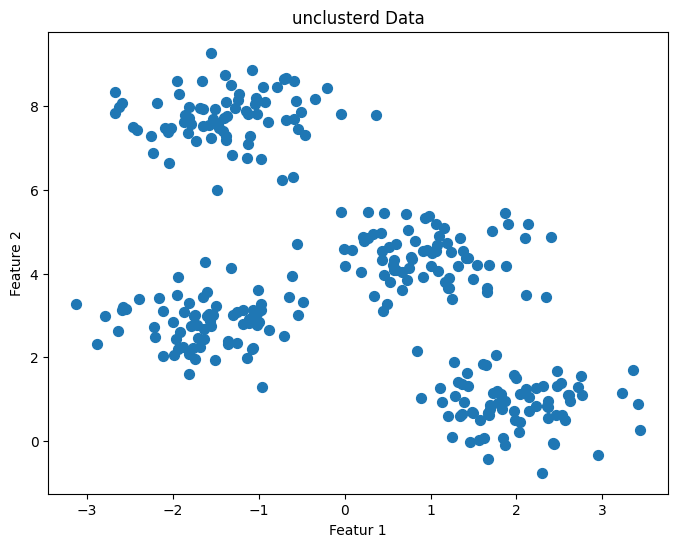

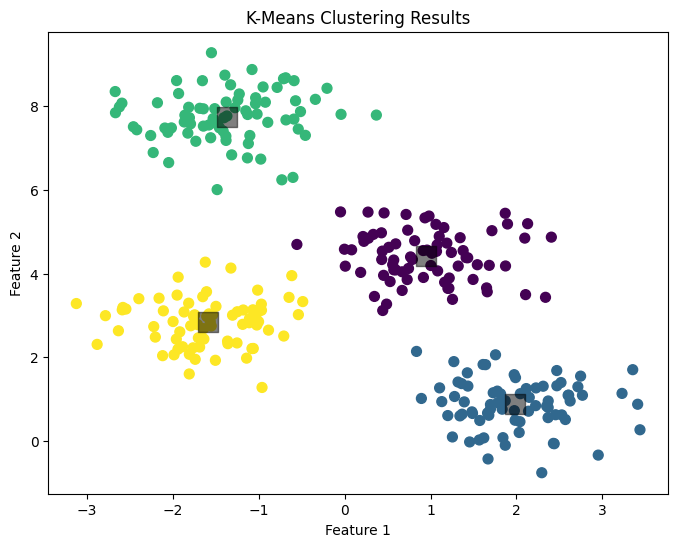

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('unclusterd Data')
plt.xlabel('Featur 1')
plt.ylabel('Feature 2')
plt.show()

kmeans =KMeans(n_clusters =4, random_state=0, n_init="auto")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha =0.5, marker='s')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Choosing optimal K-Elbow Method

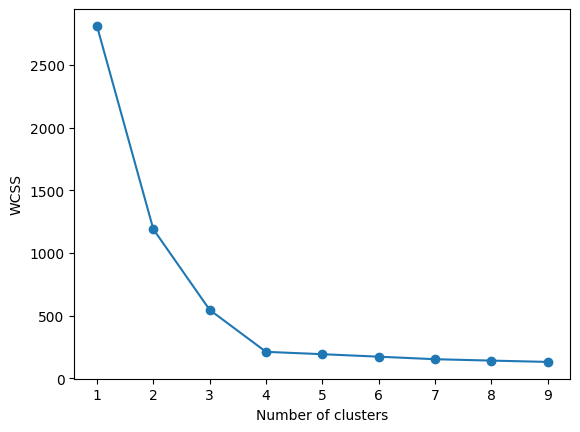

In [ ]:
wcss =[]
for k in range(1,10):
  km = KMeans(n_clusters= k)
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1, 10), wcss, marker= 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


hierarchical clustering


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


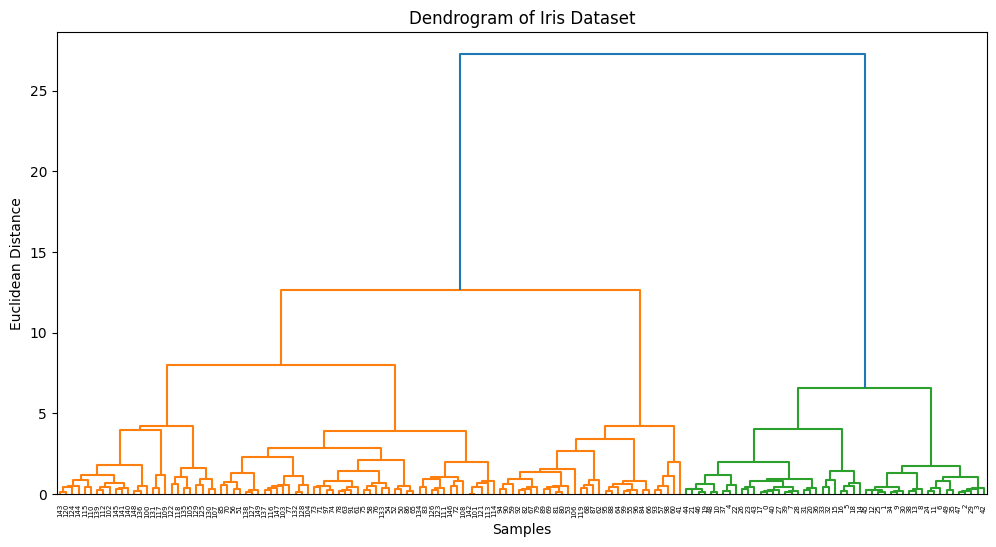

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


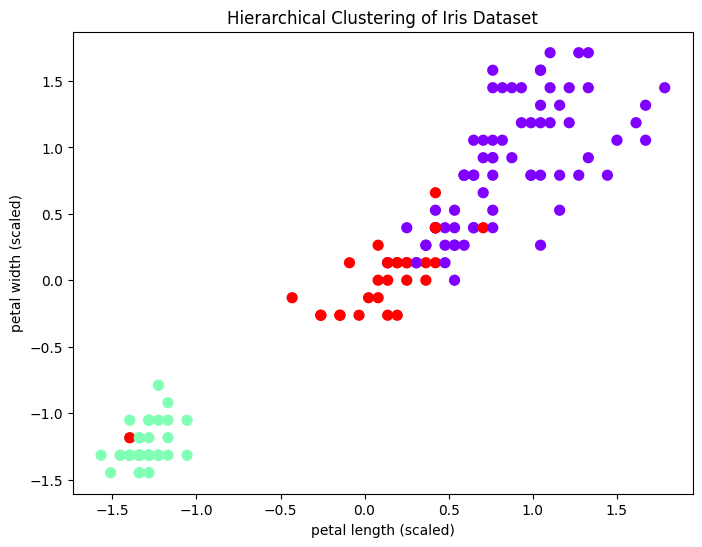

   Actual Class  Prdicted Cluster
0             0                 1
1             0                 1
2             0                 1
3             0                 1
4             0                 1
5             0                 1
6             0                 1
7             0                 1
8             0                 1
9             0                 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(12, 6))
linked = linkage(X_scaled, method='ward')

dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title("Dendrogram of Iris Dataset")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

hc = AgglomerativeClustering(
    n_clusters=3,
    metric = 'euclidean',
    linkage = 'ward'
)
clusters = hc.fit_predict(X_scaled)

df['Cluster']= clusters
print(df.head())

plt.figure(figsize=(8, 6))

plt.scatter(
    X_scaled[:, 2],
    X_scaled[:, 3],
    c=clusters,
    cmap= 'rainbow',
    s=50
)

plt.title("Hierarchical Clustering of Iris Dataset")
plt.xlabel("petal length (scaled)")
plt.ylabel("petal width (scaled)")
plt.show()

comparison = pd.DataFrame({
    'Actual Class': y,
    'Prdicted Cluster': clusters
})

print(comparison.head(10))

In [ ]:
data=pd.read_csv('book.csv')
data

,student,ID,attendance,CIE,ESE
0,1,s1,95,18,92
1,2,s2,99,95,93
2,3,s3,97,12,99
3,4,s4,92,14,89
4,5,s5,100,15,90
5,6,s6,65,17,91
6,7,s7,78,19,76
7,8,s8,85,20,87
8,9,s9,98,20,88
9,10,s10,99,19,67


In [ ]:
df=pd.DataFrame(data)
df
new=df.drop('ESE', axis=True)
new

,student,ID,attendance,CIE
0,1,s1,95,18
1,2,s2,99,95
2,3,s3,97,12
3,4,s4,92,14
4,5,s5,100,15
5,6,s6,65,17
6,7,s7,78,19
7,8,s8,85,20
8,9,s9,98,20
9,10,s10,99,19


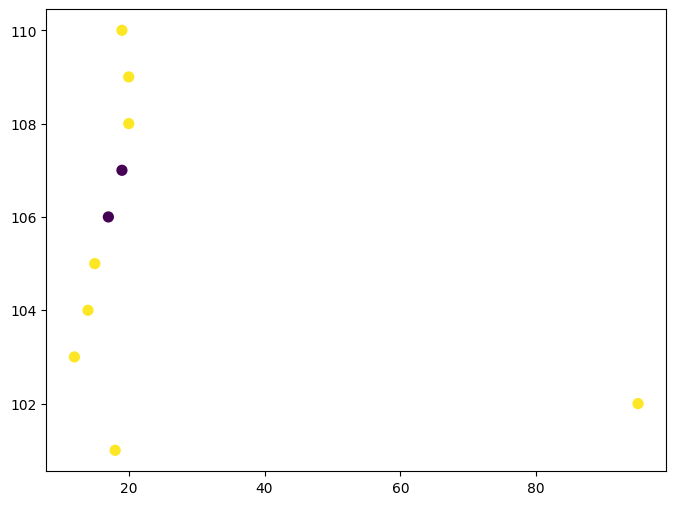

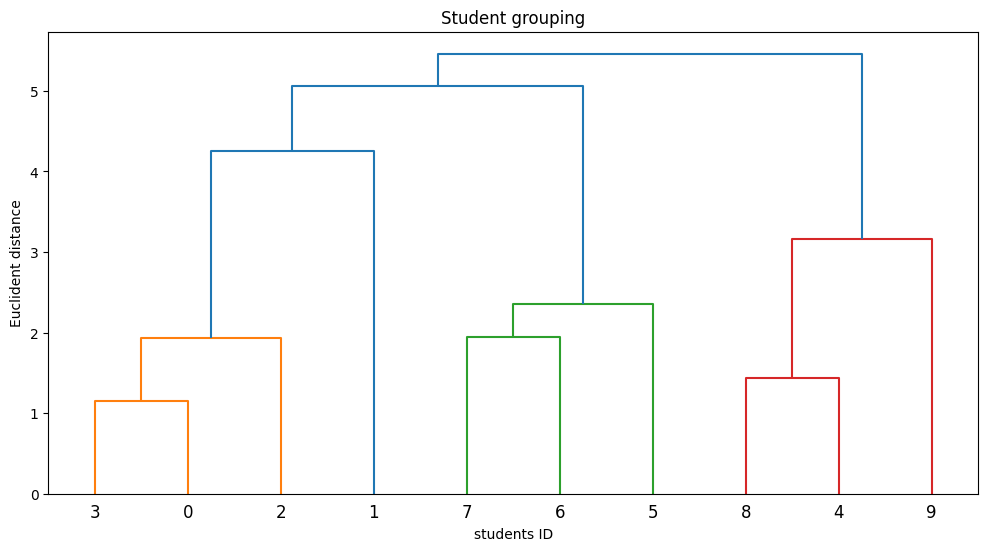

   Age   ID  attendance  CIE  ESE P/F  cluster
0   19  101          95   18   92   P        0
1   19  102          99   95   93   P        0
2   18  103          97   12   99   P        0
3   19  104          92   14   89   P        0
4   20  105         100   15   90   P        1
5   18  106          65   17   91   P        0
6   19  107          78   19   76   F        0
7   18  108          85   20   87   P        0
8   20  109          98   20   88   P        1
9   20  110          99   19   67   F        1
  Actual Class  Predicted Cluster
0            P                  0
1            P                  0
2            P                  0
3            P                  0
4            P                  1
5            P                  0
6            F                  0
7            P                  0
8            P                  1
9            F                  1


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
import sklearn.datasets as datasets

df=pd.read_csv("dataset.csv")
feature=['ID','Age','Attendance','CIE','ESE','P/F']
df1=df.drop('P/F',axis=True)


kmeans=KMeans(n_clusters=2,random_state=0,n_init="auto")
kmeans.fit(df1)
y_means=kmeans.predict(df1)

plt.figure(figsize=(8,6))
plt.scatter(df1['CIE'],df1['ID'],c=y_means,s=50,cmap='viridis')
plt.show()

scaler=StandardScaler()
x_scaler=scaler.fit_transform(df1)

plt.figure(figsize=(12,6))
linked= linkage( x_scaler,method='ward')

dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)

plt.title("Student grouping")
plt.xlabel("students ID")
plt.ylabel("Euclident distance")
plt.show()

hc=AgglomerativeClustering(
    n_clusters=2,
    metric='euclidean',
    linkage='ward',
)

clusters=hc.fit_predict(x_scaler)

df['cluster']=clusters
print(df)

comparision=pd.DataFrame({
    'Actual Class':df['P/F'],
    'Predicted Cluster': clusters
})
print (comparision)